In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Determine city from latitude and longitude
from citipy import citipy

# Get api key from config file, an untracked file in gitignore
from config import api_key

output_files = 'Output/cities.csv'

# Define range of latitudes and longitudes
lat_r=(-45, 45)
lng_r=(-180, 180)

##### Generate List of Cities

In [2]:
# Variable with an empty list to hold cities and lat_long
cities = []
lat_long = []

# Randomize creation of latitude & longitude. Set np size to 1000; change if needed
lat = np.random.uniform(low=-45.00, high=45.00, size=50)
lng = np.random.uniform(low=-180, high = 180, size=50)
lat_long = zip(lat, lng)

# Find nearest city with geo coordinates
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Validate sufficient number of cities generated        
len(cities)

42

##### API Calls

In [3]:
# Set up api endpoints
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Setup URL query
query_url = f'{base_url}appid={api_key}&units={units}&q='

# Dictionary of variables where data from api calls will be stored
city_data = {'City_Name':[], 'City_Lat':[], 'City_Long':[], 'Temperature':[], 'Humidity':[],
             'Cloudiness':[], 'Wind_Speed':[], 'Country':[], 'Date':[]}

In [11]:
# Loop iterating openweather api calls, adding retrieved data into the city_data dictionary.

city_ttls = len(cities)
r = 1

print('Retrieving weather data')
print('-' * 30)

for r, city in enumerate(cities):
    try:
        print(f'Retrieving {city}, number {r} of {city_ttls}.')
        r+=1
        city = requests.get(query_url + city).json()
        city_data["City_Name"].append(city["name"])
        city_data["City_Lat"].append(city["coord"]["lat"])
        city_data["City_Long"].append(city["coord"]["lon"])
        city_data["Temperature"].append(city["main"]["temp"])
        city_data["Humidity"].append(city["main"]["humidity"])
        city_data["Cloudiness"].append(city["clouds"]["all"])
        city_data["Wind_Speed"].append(city["wind"]["speed"])
        city_data["Country"].append(city["sys"]["country"])
        city_data["Date"].append(city["dt"])
        
        # Use timer to delay request to not exceed query limits.
        time.sleep(0.75)
    except:
        print(f'Incomplete record for {city}. Skipping {city}.')
        pass

print(f'Data retrieval completed.')

Retrieving weather data
------------------------------
Retrieving ngukurr, number 0 of 42.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving bida, number 1 of 42.
Retrieving jamestown, number 2 of 42.
Retrieving mantua, number 3 of 42.
Retrieving namatanai, number 4 of 42.
Retrieving lompoc, number 5 of 42.
Retrieving cayenne, number 6 of 42.
Retrieving colares, number 7 of 42.
Retrieving pisco, number 8 of 42.
Retrieving busselton, number 9 of 42.
Retrieving kyaikkami, number 10 of 42.
Retrieving yulara, number 11 of 42.
Retrieving mrirt, number 12 of 42.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving bengkulu, number 13 of 42.
Retrieving kodiak, number 14 of 42.
Retrieving bosaso, number 15 of 42.
Retrieving diffa, number 16 of 42.
Retrieving eureka, number 17 of 42.
Retrieving taolanaro, number 18 of 42.
Incomplete rec

In [16]:
# Create New Dataframe From City Data
city_data_df = pd.DataFrame(city_data)
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], format='%y%m%d')
city_data_df.to_csv('Output/city_data.csv')

city_data_df.dtypes

# city_data_df.head()

ValueError: unconverted data remains: 782246

##### Plotting City Data

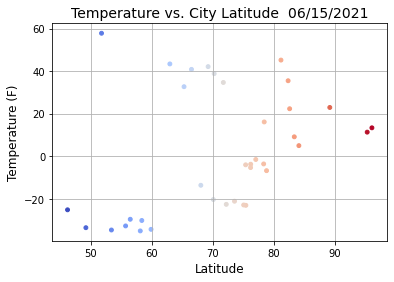

In [6]:
# Plot relationship of Temperature (F) vs. Latitude
plt.scatter(city_data_df['Temperature'], city_data_df['City_Lat'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title(f'Temperature vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.grid()

plt.savefig('Images/temperature-vs-latitude.png')
plt.show()

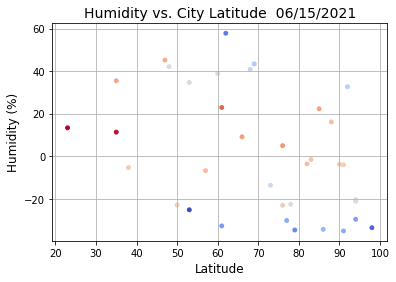

In [7]:
# Plot relationship of Humidity (%) vs. Latitude
plt.scatter(city_data_df['Humidity'], city_data_df['City_Lat'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Humidity vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Humidity (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.grid() # add (True) for test

plt.savefig('Images/humidity-vs-latitude.png')
plt.show()

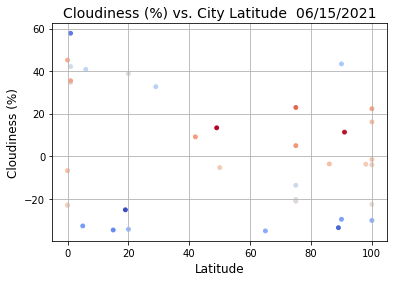

In [8]:
# Plot relationship of Humidity (%) vs. Latitude
plt.scatter(city_data_df['Cloudiness'], city_data_df['City_Lat'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Cloudiness (%) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.grid() # add (True) for test

plt.savefig('Images/cloudiness-vs-latitude.png')
plt.show()

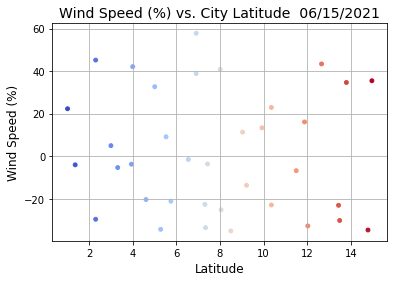

In [9]:
# Plot relationship of Wind Speed (%) vs. Latitude
plt.scatter(city_data_df['Wind_Speed'], city_data_df['City_Lat'], 
           c =city_data_df['Wind_Speed'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Wind Speed (%) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Wind Speed (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.grid()

plt.savefig('Images/wind_speed-vs-latitude.png')
plt.show()